<center><h1> ISyE6644: Second Project </h1></center>
<center> <h2> — Pablo González — </h2> </center>

In [8]:
import main as sim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.dataframe {
    margin-left: auto !important;
    margin-right: auto !important;

}

</style>
""")

This notebook provides an alternative presentation for the obtained results. For this purpose, we can first generate a couple of random numbers to demonstrate that calling the function without a seed will provide different numbers each time.

In [9]:
for i in range(3):
    print(sim.unif(3))

[0.7441610184323508, 0.2670776409213431, 0.13857630130951293]
[0.7947698966600001, 0.6370322341972496, 0.15430448349798098]
[0.8880564775608946, 0.38981517785578035, 0.8996304618776776]


On the other hand, these would be the results when providing the seed "6644":

In [10]:
for i in range(3):
    print(sim.unif(3, seed = 6644))

[0.8111341712065041, 5.836060154251754e-05, 0.65034267687588]
[0.8111341712065041, 5.836060154251754e-05, 0.65034267687588]
[0.8111341712065041, 5.836060154251754e-05, 0.65034267687588]


Once we have done that, we generate a million Uniform(0,19 PRN's using our Tausworthe pseudo-random numbers generator and the seed 6644. Once we have them, we can also run the required statistical tests.

In [11]:
urv = sim.unif(1000000, seed = 6644)
sim.tests(urv)

We fail to reject the null hypothesis of uniformity
We fail to reject the null hypothesis of independence
Additionally, the autocorrelation coefficient is equal to: -0.0004965219020113841


Although these tests were already included in a function, the following code shows how to perform each test individually. As we can notice, our PRN's can be considered i.i.d Uniform(0,1) with a 95% level of confidence.

In [12]:
def gof(prns, nbins = 10):
    # Goodness of fit test: H0 of uniformity.
    bins = np.array(list(range(0,nbins,1)))/nbins # As in the exercises
    expected = [len(prns)/nbins]*nbins
    observed = np.bincount(np.digitize(prns,bins))[1:]
    chi0 = sum( np.divide( (observed-expected)**2, expected) )
    return chi0 #> 16.919

def correlation(prns):
    return np.corrcoef( prns[:-1], prns[1:] )[1,0]

def runs(prns):
    # Runs test: H0 of independence.
    temp = np.sign( np.diff( np.sign( np.append([0], np.diff(prns,1)) ) ) )
    runs, n = np.count_nonzero(temp), len(prns)
    A_mean, A_var = (2*n-1)/3, (16*n-29)/90
    z0 = (runs-A_mean)/np.sqrt(A_var)
    return abs(z0) #> 1.96

print(f"Observed chi-squared statistic is: {round( gof(urv), 3)}. vs Expected value of 16.919")
print(f"Observed Z score is: {round( runs(urv), 3)}. vs Expected value of 1.96")
print(f"The autocorrelation is: {correlation(urv)}, which can be approximated to 0")

Observed chi-squared statistic is: 5.225. vs Expected value of 16.919
Observed Z score is: 0.827. vs Expected value of 1.96
The autocorrelation is: -0.0004965219020113841, which can be approximated to 0


Once we have conducted the required tests, we plot the generated sequence, obtaining the following figures:

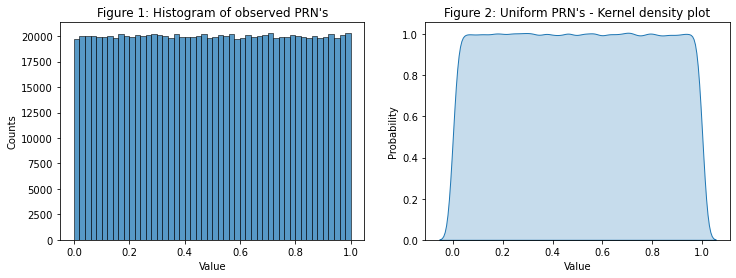

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(urv, bins = 50, ax = ax1)
ax1.set(xlabel = "Value", ylabel = "Counts", title = "Figure 1: Histogram of observed PRN's")
sns.kdeplot(urv, fill = True, ax = ax2)
ax2.set(xlabel = "Value", ylabel = "Probability", title = "Figure 2: Uniform PRN's - Kernel density plot")
plt.show()

When analyzing these figures, we can see that our generator gives PRN’s that are approximately i.i.d. Uniform(0,1). <br>
Furthermore, the following scatterplot adjacent PRN’s shows us that there are not any patterns.

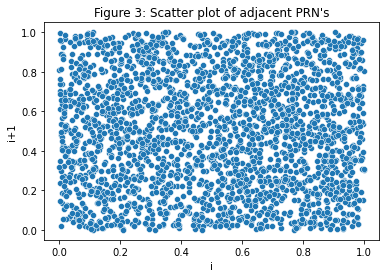

In [14]:
smallset = urv[:5000]
p1 = [smallset[i] for i in range(len(smallset)) if i%2==1]
p2 = [smallset[i] for i in range(len(smallset)) if i%2==0]
dots = sns.scatterplot( x = p1, y = p2 , legend = None)
dots.set(xlabel = "i", ylabel = "i+1", title = "Figure 3: Scatter plot of adjacent PRN's")
plt.show()

# Normal deviates generation

Finally, using the Box-Muller transformation, we can generate i.i.d Normal(0,1) PRN's using our previously generated numbers.

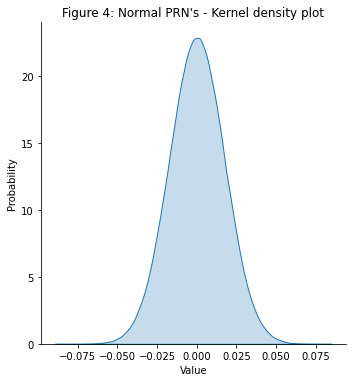

In [15]:
nrv = sim.norm(500000,0,1, seed = 12345)
displot2 = sns.displot(nrv, kind = "kde", fill = True)
displot2.set(xlabel = "Value", ylabel = "Probability", title = "Figure 4: Normal PRN's - Kernel density plot")
plt.show()